In [1]:
## For experimenting with regression

# For some reason, statmodels refuses to install "easily"
!pip install --upgrade pip
!pip install --upgrade statsmodels
!pip install --upgrade mlflow
import sys
print(sys.executable)
!{sys.executable} -m pip install statsmodels

/home/studio-lab-user/.conda/envs/default/bin/python


In [2]:
## Import libraries

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import mlflow
import matplotlib
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

In [3]:
## Get data
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv

df = pd.read_csv('doggy-boot-harness.csv')
df.head()

--2025-02-18 11:46:34--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 838 [text/plain]
Saving to: 'doggy-boot-harness.csv.1'

doggy-boot-harness. 100%[===================>]     838  --.-KB/s    in 0s      

2025-02-18 11:46:34 (43.7 MB/s) - 'doggy-boot-harness.csv.1' saved [838/838]



,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


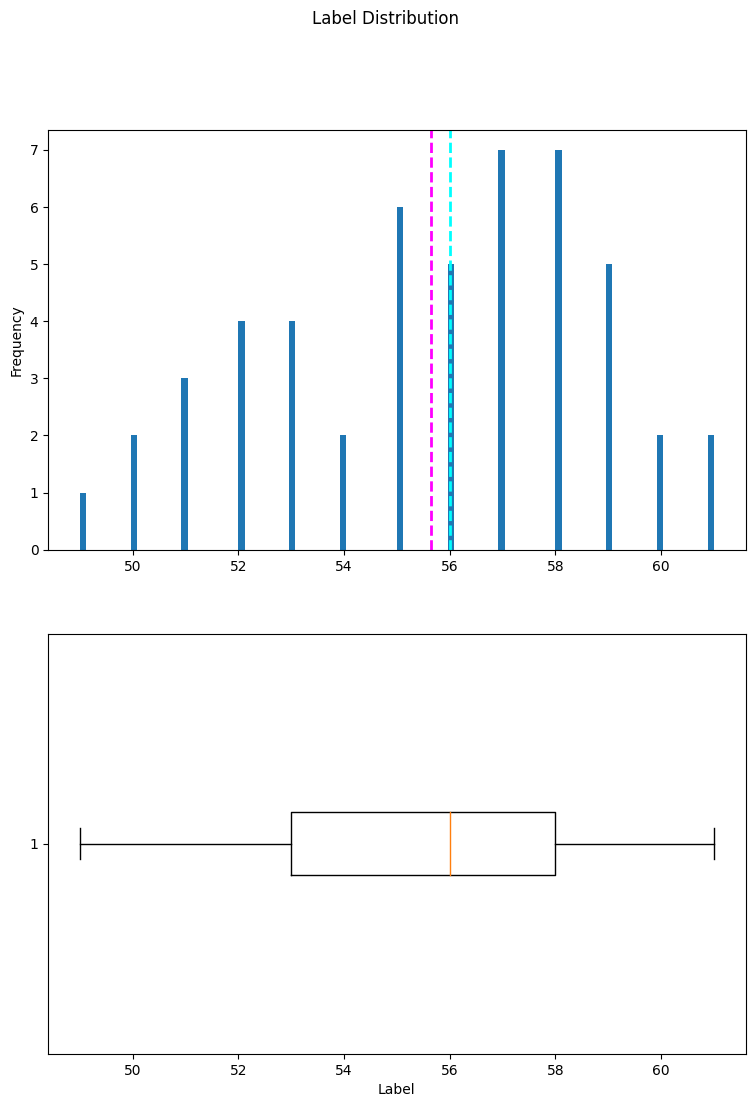

In [4]:
## Describe target
label = df['harness_size']
# print(label.value_counts())

# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Label')

# Add a title to the Figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()

In [5]:
## Train regression model
formula = "boot_size ~ harness_size"

model = smf.ols(formula = formula, data = df).fit()

In [6]:
# Print model parameters
model.params

Intercept       5.719110
harness_size    0.585925
dtype: float64

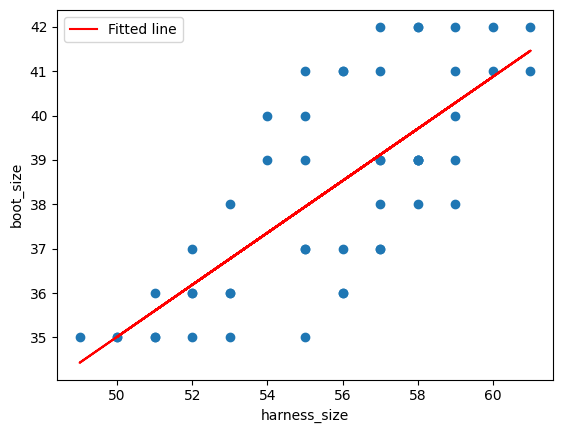

In [7]:

plt.scatter(df["harness_size"], df["boot_size"])
plt.plot(df["harness_size"], model.params[1] * df["harness_size"] + model.params[0], 'r', label='Fitted line')

# add labels and legend
plt.xlabel("harness_size")
plt.ylabel("boot_size")
plt.legend()

In [8]:
# Model
model2 = LinearRegression()
model2.fit(df[["boot_size"]], df[["harness_size"]])

# Print results
print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)
r_squared = model2.score(df[["boot_size"]], df["harness_size"])
print("R-squared:", r_squared)
predictions = model2.predict(df[["boot_size"]])
print("Predictions:", predictions)

Coefficients: [[0.97109086]]
Intercept: [18.42779835]
R-squared: 0.5689868152575153
Predictions: [[56.30034178]
 [55.32925093]
 [54.35816007]
 [56.30034178]
 [55.32925093]
 [52.41597835]
 [54.35816007]
 [53.38706921]
 [52.41597835]
 [57.27143264]
 [57.27143264]
 [53.38706921]
 [55.32925093]
 [56.30034178]
 [59.21361435]
 [59.21361435]
 [53.38706921]
 [53.38706921]
 [52.41597835]
 [58.2425235 ]
 [59.21361435]
 [55.32925093]
 [54.35816007]
 [52.41597835]
 [57.27143264]
 [53.38706921]
 [52.41597835]
 [56.30034178]
 [58.2425235 ]
 [54.35816007]
 [52.41597835]
 [58.2425235 ]
 [56.30034178]
 [58.2425235 ]
 [59.21361435]
 [59.21361435]
 [53.38706921]
 [54.35816007]
 [54.35816007]
 [56.30034178]
 [59.21361435]
 [52.41597835]
 [53.38706921]
 [58.2425235 ]
 [58.2425235 ]
 [58.2425235 ]
 [56.30034178]
 [56.30034178]
 [52.41597835]
 [56.30034178]]


In [9]:
X = df[["harness_size"]].assign(const=1)
y = df[["boot_size"]]
model3 = sm.OLS(y, X)
result_model3 = model3.fit()
result_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              boot_size   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     63.37
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           2.53e-10
Time:                        11:46:50   Log-Likelihood:                -93.054
No. Observations:                  50   AIC:                             190.1
Df Residuals:                      48   BIC:                             193.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
harness_size     0.5859      0.074      7.960      0.000       0.438       0.734
const            5.7191      4.102      1.394      0.170      -2.528      13.966
==============================================================================
Omnibus:                        2.715   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.257   Jarque-Bera (JB):                1.758
Skew:                           0.228   Prob(JB):                        0.415
Kurtosis:                       2.203   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""